In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
#Import Data from Input
df= pd.read_csv(r"C:\\Users\\shiny\\Downloads\\Automobile_data.csv")

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.shape


(205, 26)

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df = df.rename({"normalized-losses":"normalizedlosses"}, axis='columns')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalizedlosses   205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df.normalizedlosses.unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [ ]:
df = df[df.normalizedlosses != "?"]
df.normalizedlosses = df.normalizedlosses.astype("float")

In [ ]:
df.horsepower.unique()

array(['102', '115', '110', '140', '101', '121', '48', '70', '68', '88',
       '145', '58', '76', '60', '86', '100', '176', '135', '84', '120',
       '123', '155', '116', '69', '55', '97', '152', '160', '200', '95',
       '142', '143', '73', '82', '94', '111', '62', '56', '112', '92',
       '161', '156', '52', '85', '90', '114', '162', '134', '106'],
      dtype=object)

In [ ]:
df = df[df.horsepower != "?"]
df.horsepower = df.horsepower.astype("int")

In [ ]:
df.stroke.unique()

array(['3.4', '2.8', '3.19', '3.03', '3.11', '3.23', '3.39', '3.46',
       '3.9', '3.41', '3.07', '3.58', '4.17', '3.15', '?', '3.16', '3.64',
       '3.1', '3.29', '3.47', '3.27', '3.52', '2.19', '3.21', '2.07',
       '2.36', '2.64', '3.35', '3.08', '3.5', '3.54', '2.87'],
      dtype=object)

In [ ]:
df = df[df.stroke != "?"]
df.stroke = df.stroke.astype("float")

In [ ]:
df = df.rename({"peak-rpm":"peakrpm"}, axis='columns')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          160 non-null    int64  
 1   normalizedlosses   160 non-null    float64
 2   make               160 non-null    object 
 3   fuel-type          160 non-null    object 
 4   aspiration         160 non-null    object 
 5   num-of-doors       160 non-null    object 
 6   body-style         160 non-null    object 
 7   drive-wheels       160 non-null    object 
 8   engine-location    160 non-null    object 
 9   wheel-base         160 non-null    float64
 10  length             160 non-null    float64
 11  width              160 non-null    float64
 12  height             160 non-null    float64
 13  curb-weight        160 non-null    int64  
 14  engine-type        160 non-null    object 
 15  num-of-cylinders   160 non-null    object 
 16  engine-size        160 non

In [ ]:
df.peakrpm.unique()

array(['5500', '5800', '4250', '5100', '5400', '5000', '4800', '6000',
       '4750', '4350', '5200', '4150', '5600', '5250', '4900', '4400',
       '4500', '6600', '4200', '5300'], dtype=object)

In [ ]:
df = df[df.peakrpm != "?"]
df.peakrpm = df.peakrpm.astype("int")

In [ ]:
df.price.unique()

array(['13950', '17450', '17710', '23875', '16430', '16925', '20970',
       '21105', '5151', '6295', '6575', '5572', '6377', '7957', '6229',
       '6692', '7609', '8558', '8921', '12964', '6479', '6855', '5399',
       '6529', '7129', '7295', '7895', '9095', '8845', '10295', '12945',
       '10345', '32250', '5195', '6095', '6795', '6695', '7395', '8495',
       '10595', '10245', '11245', '18280', '25552', '28248', '28176',
       '31600', '35056', '5389', '6189', '6669', '7689', '9959', '8499',
       '6989', '8189', '9279', '5499', '7099', '6649', '6849', '7349',
       '7299', '7799', '7499', '7999', '8249', '8949', '9549', '13499',
       '14399', '17199', '19699', '18399', '11900', '13200', '15580',
       '16900', '16630', '17950', '18150', '22018', '11850', '12170',
       '15040', '15510', '18620', '5118', '7053', '7603', '7126', '7775',
       '9960', '9233', '11259', '7463', '10198', '8013', '11694', '5348',
       '6338', '6488', '6918', '7898', '8778', '6938', '7198', '77

In [ ]:
df = df[df.price != "?"]
df.price = df.price.astype("int")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          160 non-null    int64  
 1   normalizedlosses   160 non-null    float64
 2   make               160 non-null    object 
 3   fuel-type          160 non-null    object 
 4   aspiration         160 non-null    object 
 5   num-of-doors       160 non-null    object 
 6   body-style         160 non-null    object 
 7   drive-wheels       160 non-null    object 
 8   engine-location    160 non-null    object 
 9   wheel-base         160 non-null    float64
 10  length             160 non-null    float64
 11  width              160 non-null    float64
 12  height             160 non-null    float64
 13  curb-weight        160 non-null    int64  
 14  engine-type        160 non-null    object 
 15  num-of-cylinders   160 non-null    object 
 16  engine-size        160 non

In [ ]:
df.describe()


,symboling,normalizedlosses,wheel-base,length,width,height,curb-weight,engine-size,stroke,compression-ratio,horsepower,peakrpm,city-mpg,highway-mpg,price
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.737500,121.300000,98.235625,172.319375,65.596250,53.878750,2459.450000,119.093750,3.237312,10.145125,95.875000,5116.250000,26.506250,32.068750,11427.681250
std,1.189511,35.602417,5.163763,11.548860,1.946999,2.276608,480.897834,30.411186,0.294210,3.882507,30.625708,465.290536,6.081208,6.440948,5863.789011
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.525000,64.000000,52.000000,2073.250000,97.000000,3.107500,8.700000,69.000000,4800.000000,23.000000,28.000000,7383.500000
50%,1.000000,114.000000,96.900000,172.200000,65.400000,54.100000,2338.500000,110.000000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9164.000000
75%,2.000000,148.000000,100.600000,177.800000,66.500000,55.500000,2808.750000,134.500000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14559.250000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


In [ ]:
df.isnull().sum()

symboling            0
normalizedlosses     0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peakrpm              0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

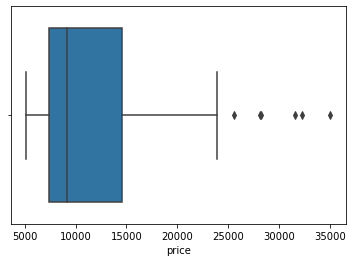

In [ ]:
import seaborn as sns
sns.boxplot(df["price"])


In [ ]:
def outliers_iqr(a):
  z=[]
  quartile_1,quartile_3=np.percentile(a,[25,75])
  iqr=quartile_3-quartile_1
  lower_bound=quartile_1-(iqr*1.5)
  upper_bound=quartile_3+(iqr*1.5)
  x=np.where((a>upper_bound)|(a<lower_bound))
  for i in x:
     z.append(x)
  return(z)

In [ ]:
outliers_iqr(df["price"])

[(array([33, 45, 46, 47, 48, 49], dtype=int64),)]

In [ ]:
df.drop([32, 47],axis=0,inplace=True)

In [ ]:
df.head()

,symboling,normalizedlosses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peakrpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [ ]:
df.dtypes


symboling              int64
normalizedlosses     float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke               float64
compression-ratio    float64
horsepower             int32
peakrpm                int32
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

<AxesSubplot:>

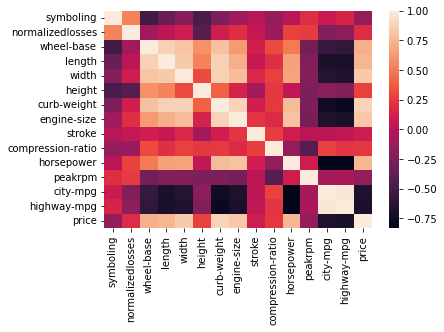

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

In [ ]:
df.corr()

,symboling,normalizedlosses,wheel-base,length,width,height,curb-weight,engine-size,stroke,compression-ratio,horsepower,peakrpm,city-mpg,highway-mpg,price
symboling,1.000000,0.523757,-0.523751,-0.334714,-0.214297,-0.476549,-0.248088,-0.097918,-0.007610,-0.141386,0.008414,0.196657,0.080858,0.142379,-0.155052
normalizedlosses,0.523757,1.000000,-0.081658,0.012700,0.095007,-0.418840,0.108978,0.194837,0.052165,-0.128228,0.283859,0.248546,-0.227959,-0.179802,0.190182
wheel-base,-0.523751,-0.081658,1.000000,0.868740,0.809748,0.581891,0.797973,0.623488,0.110389,0.312633,0.487232,-0.283009,-0.560604,-0.592042,0.716217
length,-0.334714,0.012700,0.868740,1.000000,0.836138,0.521774,0.865367,0.715381,0.066097,0.202867,0.649432,-0.224970,-0.702174,-0.703970,0.749357
width,-0.214297,0.095007,0.809748,0.836138,1.000000,0.306984,0.869555,0.783252,0.156393,0.272791,0.666407,-0.225902,-0.652681,-0.679534,0.841577
height,-0.476549,-0.418840,0.581891,0.521774,0.306984,1.000000,0.391652,0.135868,-0.091001,0.236413,0.037015,-0.252132,-0.198367,-0.227341,0.266751
curb-weight,-0.248088,0.108978,0.797973,0.865367,0.869555,0.391652,1.000000,0.880760,0.108164,0.247980,0.775406,-0.250150,-0.751847,-0.779566,0.884532
engine-size,-0.097918,0.194837,0.623488,0.715381,0.783252,0.135868,0.880760,1.000000,0.224070,0.171508,0.803818,-0.279569,-0.691629,-0.705980,0.825681
stroke,-0.007610,0.052165,0.110389,0.066097,0.156393,-0.091001,0.108164,0.224070,1.000000,0.260303,0.098596,0.010461,0.024457,0.033848,0.090966
compression-ratio,-0.141386,-0.128228,0.312633,0.202867,0.272791,0.236413,0.247980,0.171508,0.260303,1.000000,-0.158575,-0.423378,0.279993,0.220564,0.233164


In [ ]:
df=df.drop(["wheel-base"],axis=1)
df.head()
df.shape

(158, 25)

In [ ]:
df=df.drop(["make"],axis=1)
df.head()
df.shape

(158, 24)

In [ ]:
df=df.drop(["fuel-system","aspiration","num-of-doors","body-style","drive-wheels","engine-location","fuel-system"],axis=1)
df.head()
df.shape

(158, 18)

In [ ]:
df=df.drop(["fuel-type"],axis=1)
df.head()
df.shape

(158, 17)

In [ ]:
df=df.drop(["engine-type"],axis=1)
df.head()
df.shape

(158, 16)

In [ ]:
df=df.drop(["num-of-cylinders"],axis=1)
df.head()
df.shape

(158, 15)

In [ ]:
df.head()

,symboling,normalizedlosses,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peakrpm,city-mpg,highway-mpg,price
3,2,164.0,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158.0,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158.0,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192.0,176.8,64.8,54.3,2395,108,3.5,2.8,8.8,101,5800,23,29,16430


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca

PCA(n_components=1)

In [ ]:
principalComponents = pca.fit_transform(df)


In [ ]:
principalComponents.shape

(158, 1)

In [ ]:
print(principalComponents[:])


[[ 2595.28031554]
 [ 6121.21712957]
 [ 6381.95115049]
 [12547.68375819]
 [ 5068.73388433]
 [ 5562.37248451]
 [ 9639.9412759 ]
 [ 9778.56675541]
 [-6236.47886471]
 [-5071.32507407]
 [-4789.56777207]
 [-5793.49308563]
 [-4990.70048048]
 [-3396.55508139]
 [-5131.64464088]
 [-4668.31937731]
 [-3753.84152692]
 [-2792.5940468 ]
 [-2398.95706433]
 [ 1653.39275246]
 [-4891.62328263]
 [-4524.72507763]
 [-4841.06637537]
 [-4241.55393477]
 [-4072.05531666]
 [-4071.08532144]
 [-3454.51933067]
 [-2253.96840302]
 [-2502.20400175]
 [-1051.25142549]
 [ 1598.28427912]
 [-1003.08708259]
 [-6161.82398094]
 [-5263.57897355]
 [-4565.1409342 ]
 [-4661.9368335 ]
 [-3963.49879291]
 [-2482.99527051]
 [-2830.23243486]
 [ -737.80853313]
 [-1085.04569748]
 [  -86.70610008]
 [ 6944.3287484 ]
 [14266.51442304]
 [16972.17667301]
 [16881.83860748]
 [20316.42824154]
 [23751.82641139]
 [-5972.87774324]
 [-5173.18199344]
 [-4690.14206989]
 [-3662.53109573]
 [-1382.30422828]
 [-2834.79307445]
 [-4337.98529516]
 [-3138.37

In [ ]:
pca.explained_variance_ratio_

array([0.99192393])

ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

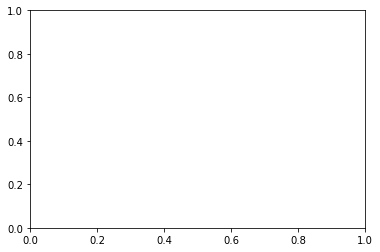

In [ ]:
plt.plot(range(2), pca.explained_variance_ratio_,label="Variance-ratio")
plt.plot(range(2), np.cumsum(pca.explained_variance_ratio_),label="cumulative variance-ratio")
plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel("No.of components")
plt.ylabel("Data_explained")

In [ ]:
#Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
training_features = [ 'length','width','curb-weight','horsepower']
target = 'price'

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df[training_features],
                                                    df[target],
                                                     test_size=0.1,random_state=222)

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)

In [ ]:
model.coef_


In [ ]:
model.intercept_

In [ ]:
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))

In [ ]:
print('R Square score: %.2f' % r2_score(Y_test, predicted))

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(model, X_train, Y_train,cv=10)


In [ ]:
scores

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), 3* scores.std() ))

Accuracy: 0.73 (+/- 0.30)


In [ ]:
#Lasso Regression


model =linear_model.Lasso(alpha=5)
model.fit(X_train,Y_train)

from sklearn.metrics import mean_squared_error, r2_score
training_features = [ 'length','width','curb-weight','horsepower']
target = 'price'
X_train, X_test, Y_train, Y_test = train_test_split(df[training_features],
                                                    df[target],
                                                     test_size=0.1,random_state=222)



In [ ]:
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))
print('R Square score: %.2f' % r2_score(Y_test, predicted))

Mean squared error: 5874511.49
R Square score: 0.80


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, Y_train,cv=10)

scores


array([0.85283967, 0.5496465 , 0.09993309, 0.82811057, 0.78175393,
       0.83087709, 0.75097281, 0.68421817, 0.71114213, 0.81003868])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), 3* scores.std() ))

Accuracy: 0.69 (+/- 0.64)


In [ ]:
#RidgeRegression


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
training_features = [ 'length','width','curb-weight','horsepower']
target = 'price'
X_train, X_test, Y_train, Y_test = train_test_split(df[training_features],
                                                    df[target],
                                                     test_size=0.1,random_state=222)



In [ ]:
model =linear_model.Ridge(alpha=10)
model.fit(X_train,Y_train)

Ridge(alpha=10)

In [ ]:
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))

print('R Square score: %.2f' % r2_score(Y_test, predicted))

Mean squared error: 6109120.80
R Square score: 0.79


In [ ]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, Y_train,cv=10)

scores


array([0.85029325, 0.52637566, 0.13488245, 0.82427246, 0.78136647,
       0.83054025, 0.76262181, 0.69171734, 0.71140007, 0.80903254])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), 3* scores.std() ))

Accuracy: 0.69 (+/- 0.62)


In [ ]:
#KNN Regressor


from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=4,
                             p=2,weights='distance')
model.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=4, weights='distance')

In [ ]:
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))

print('R Square score: %.2f' % r2_score(Y_test, predicted))

Mean squared error: 12388238.85
R Square score: 0.58


In [ ]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, Y_train,cv=10)

scores


array([0.85893749, 0.63650288, 0.45239699, 0.87645662, 0.88335373,
       0.77703851, 0.84099436, 0.55447214, 0.70865977, 0.94697372])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), 3* scores.std() ))

Accuracy: 0.75 (+/- 0.46)


In [ ]:
#Neural Network

from sklearn.neural_network import MLPRegressor

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
training_features = [ 'length','width','curb-weight','horsepower']
target = 'price'
X_train, X_test, Y_train, Y_test = train_test_split(df[training_features],
                                                    df[target],
                                                     test_size=0.1,random_state=222)


In [ ]:
model =MLPRegressor(hidden_layer_sizes=(100,10,50),activation='tanh')

In [ ]:
model.fit(X_train,Y_train)

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 10, 50))

In [ ]:
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))

print('R Square score: %.2f' % r2_score(Y_test, predicted))

Mean squared error: 222069320.54
R Square score: -6.54


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, Y_train,cv=10)

scores


E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer

array([ -4.72904487,  -6.76958747, -13.35388065,  -2.4503772 ,
        -3.35492748,  -5.91468527,  -4.16524559,  -5.31747154,
        -6.16531129,  -3.29268685])

In [ ]:

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), 3* scores.std() ))


Accuracy: -5.55 (+/- 8.75)


In [ ]:
#Regression trees

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='mae',max_depth=5,min_samples_leaf=4,min_samples_split=4)
model.fit(X_train,Y_train)

E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf=4,
                      min_samples_split=4)

In [ ]:
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))

print('R Square score: %.2f' % r2_score(Y_test, predicted))

Mean squared error: 9519435.94
R Square score: 0.68


[Text(0.6176470588235294, 0.9166666666666666, 'X[2] <= 2664.0\nmae = 3818.239\nsamples = 142\nvalue = 8948.5'),
 Text(0.36764705882352944, 0.75, 'X[2] <= 2291.5\nmae = 1502.549\nsamples = 102\nvalue = 7896.5'),
 Text(0.19117647058823528, 0.5833333333333334, 'X[2] <= 1998.5\nmae = 835.453\nsamples = 64\nvalue = 7163.5'),
 Text(0.11764705882352941, 0.4166666666666667, 'X[2] <= 1902.5\nmae = 558.679\nsamples = 28\nvalue = 6504.0'),
 Text(0.058823529411764705, 0.25, 'X[2] <= 1875.0\nmae = 509.889\nsamples = 9\nvalue = 6095.0'),
 Text(0.029411764705882353, 0.08333333333333333, 'mae = 472.0\nsamples = 4\nvalue = 6387.0'),
 Text(0.08823529411764706, 0.08333333333333333, 'mae = 355.6\nsamples = 5\nvalue = 5572.0'),
 Text(0.17647058823529413, 0.25, 'X[0] <= 158.75\nmae = 487.0\nsamples = 19\nvalue = 6692.0'),
 Text(0.14705882352941177, 0.08333333333333333, 'mae = 546.1\nsamples = 10\nvalue = 6229.0'),
 Text(0.20588235294117646, 0.08333333333333333, 'mae = 270.111\nsamples = 9\nvalue = 6795.0'),

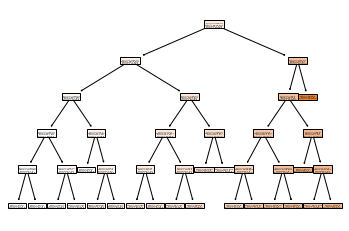

In [ ]:
from sklearn.tree import plot_tree
plot_tree(model,filled=True)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, Y_train,cv=10)

scores

E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 an

array([0.81474477, 0.62690434, 0.44097421, 0.82795639, 0.89808225,
       0.74624446, 0.88347892, 0.71621996, 0.77092197, 0.94997441])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), 3* scores.std() ))

Accuracy: 0.77 (+/- 0.42)


In [ ]:
#SVR

from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train,Y_train)

SVR(kernel='linear')

In [ ]:
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))

print('R Square score: %.2f' % r2_score(Y_test, predicted))

Mean squared error: 9794854.40
R Square score: 0.67


In [ ]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, Y_train,cv=10)

scores

array([0.81111938, 0.6505549 , 0.48148009, 0.73129806, 0.73213532,
       0.80326901, 0.81236196, 0.68020696, 0.81925003, 0.76819261])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), 3* scores.std() ))

Accuracy: 0.73 (+/- 0.30)
